In [38]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, transform

In [39]:
ori_image = io.imread('/Users/lumizhang/Life/background/1293291.png')  # Replace with your image path
if len(ori_image.shape) == 3:  
    ori_image = color.rgb2gray(ori_image[:,:, :3])  

image = transform.resize(ori_image, (100, 100), anti_aliasing=True)

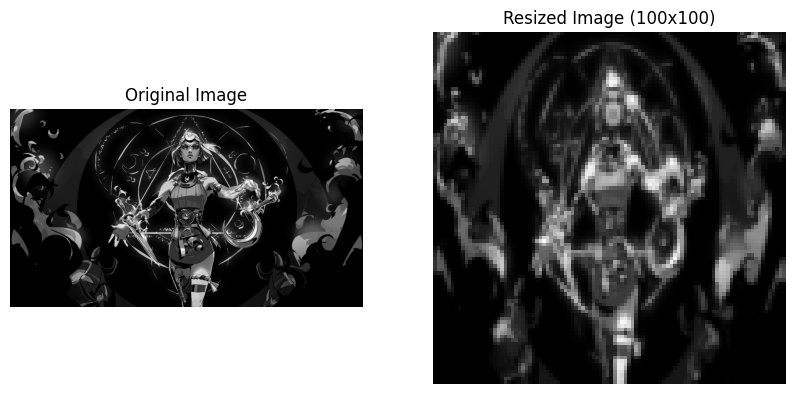

In [40]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(ori_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Display the resized image
plt.subplot(1, 2, 2)
plt.imshow(image, cmap='gray')
plt.title('Resized Image (100x100)')
plt.axis('off')

plt.show()

In [41]:
f_transform = np.fft.fft2(image)
f_transform_shifted = np.fft.fftshift(f_transform)
magnitude_spectrum = np.abs(f_transform_shifted)

inverse_f_transform_shifted = np.fft.ifftshift(f_transform_shifted)
inverse_f_transform = np.fft.ifft2(inverse_f_transform_shifted)
inverse_image = np.abs(inverse_f_transform)

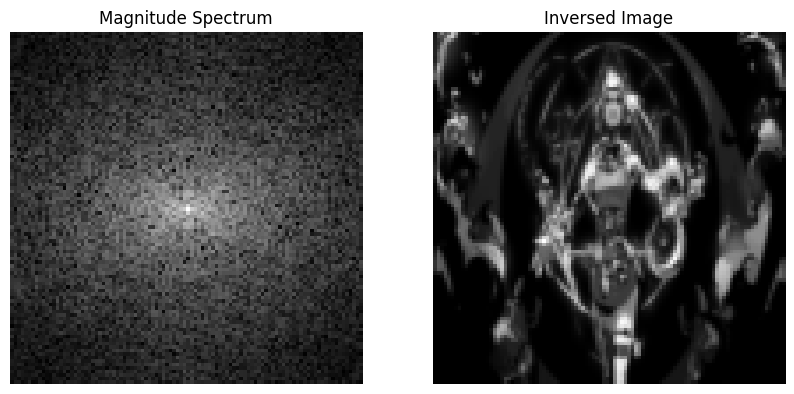

In [42]:
# Display the magnitude spectrum and the original image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(np.log(1 + magnitude_spectrum), cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')

# Display the original Image
plt.subplot(1, 2, 2)
plt.imshow(inverse_image, cmap='gray') 
plt.title('Inversed Image')
plt.axis('off')

plt.show()

In [43]:
def ctf_function(z, x):
    """
    Computes the CTF for a given defocus value z and spatial frequency x.

    Args:
        z (float): Defocus value (angstrom)
        x (float): Spatial frequency (angstrom^-1)

    Returns:
        float: The CTF value for the given defocus and spatial frequency.
    """
    return np.sin(- np.pi * z * x**2 + np.pi / 2 * x ** 4)

# Generate a 2D meshgrid of size 100,100 and calculate the CTF values
z_init = 1
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
r = np.sqrt(X**2 + Y**2)
ctf = ctf_function(z_init, r)

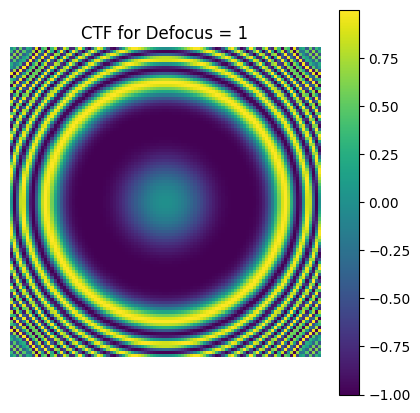

In [44]:
plt.figure(figsize=(5, 5))
plt.imshow(ctf, cmap='viridis')
plt.colorbar()
plt.title('CTF for Defocus = 1')
plt.axis('off')

plt.show()

In [45]:
# Perform element-wise multiplication
filtered_f_transform = f_transform_shifted * ctf

# Inverse Fourier Transform to get the filtered image
filtered_f_transform_shifted = np.fft.ifftshift(filtered_f_transform)
filtered_image = np.fft.ifft2(filtered_f_transform_shifted)
filtered_image = np.abs(filtered_image)

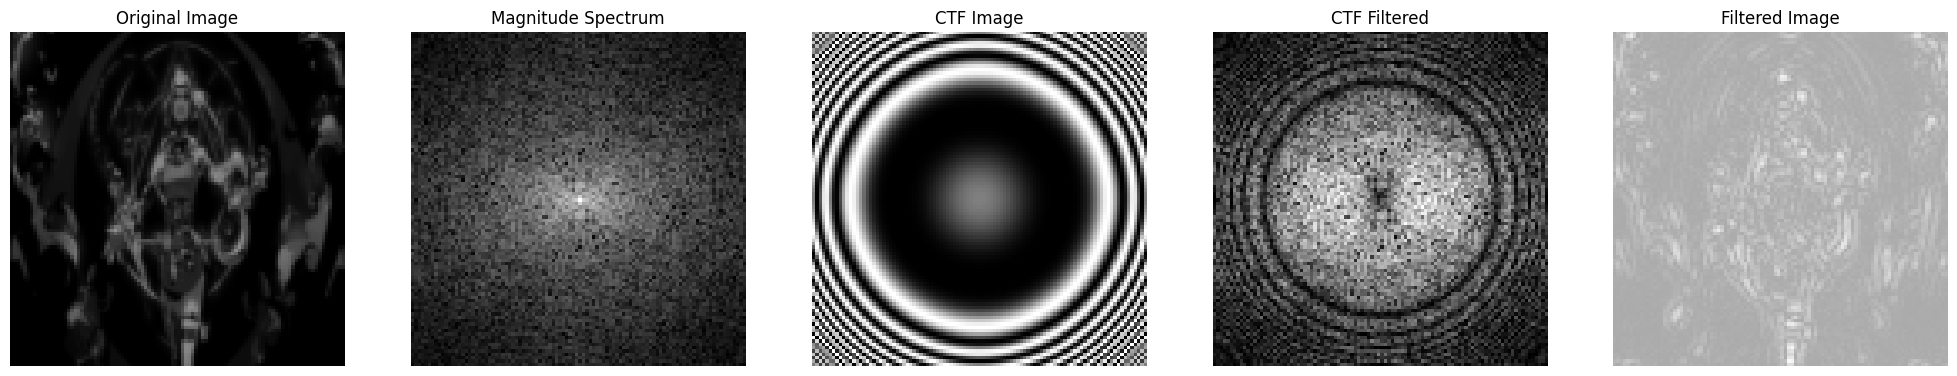

In [54]:
# Display the original, CTF, and filtered images
plt.figure(figsize=(25, 5))

plt.subplot(1, 5, 1)
plt.imshow(image, cmap='gray', vmin=0, vmax=1.5)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 5, 2)
plt.imshow(np.log(1 + magnitude_spectrum), cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')

plt.subplot(1, 5, 3)
plt.imshow(ctf, cmap='gray')
plt.title('CTF Image')
plt.axis('off')

plt.subplot(1, 5, 4)
plt.imshow(np.log(np.abs(filtered_f_transform) + 1), cmap='gray')
plt.title('CTF Filtered')
plt.axis('off')

plt.subplot(1, 5, 5)
plt.imshow(1 + filtered_image, cmap='gray', vmin=0, vmax=1.5)
# plt.imshow(1 + filtered_image, cmap='gray')
plt.title('Filtered Image')
plt.axis('off')

plt.show()